## Exploration of HHS plan rates PUF data
steeve@stanford.edu

### A bit of setup

In [58]:
#Setup
import datetime as dt
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#import helper functions
from utils.utils import*

%matplotlib inline

#make work flow
%load_ext autoreload
%autoreload 2

# Useful colors to reference
SNS_BLUE, SNS_GREEN, SNS_RED, SNS_PURPLE, SNS_YELLOW, SNS_CYAN = sns.color_palette()
# sns.set_palette(sns.color_palette("cubehelix", 8))
pd.set_option('display.max_columns', 500)
plt.rcParams.update({
  'font.size': 14,
  'axes.titlesize': 'x-large',
  'axes.labelsize': 'large',
  'xtick.labelsize': 'medium',
  'ytick.labelsize': 'medium',
  'legend.fancybox': True,
  'legend.fontsize': 'medium',
  'legend.frameon': True,
  'legend.framealpha': 0.7,
  'figure.figsize': ['9', '6'],
})

#steeve@stanford.edu from everett@bayesimpact.org

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Locate the data
data are for 2014, 2015 and 2016

In [60]:
#e.g., I put the data in my google drive 
#(e.g., DATA_FILE_2014 = '~/Google\ Drive/data-cleaned/Plan_Rate_PUF_2014.csv')
DATA_FILE_2014 = '~/Google Drive/bayeshack2016-prep-HHS/data-raw/PlanRate/Plan_Rate_PUF_2014.csv'
DATA_FILE_2015 = '~/Google Drive/bayeshack2016-prep-HHS/data-raw/PlanRate/Plan_Rate_PUF_2015.csv'
DATA_FILE_2016 = '~/Google Drive/bayeshack2016-prep-HHS/data-raw/PlanRate/Plan_Rate_PUF_2016.csv'
DATA_FILE_cleaned = '/Google Drive/bayeshack2016-prep-HHS/data-cleaned/'

### Load, convert, and glance at the data

In [61]:
df_2014 = pd.read_csv(DATA_FILE_2014)
df_2015 = pd.read_csv(DATA_FILE_2015)
df_2016 = pd.read_csv(DATA_FILE_2016)

### The three datasets (2014, 2015, 2016) had the same attribute columns and could be concatenated

In [62]:
#check that attribute columns match between datasets
checkDataFramesVarMatch(df_2014,df_2015)
checkDataFramesVarMatch(df_2015,df_2016)
print '...so we make one big dataset !'
df,N,tab = concatDataFrames(df_2014,df_2015,df_2016)
tab

100 % of the variables matched
100 % of the variables matched
...so we make one big dataset !
Read 11584006 rows 24 cols



,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0010001,Rating Area 1,No Preference,0-20,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 1,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,21989AK0020001,Rating Area 2,No Preference,Family Option,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15


### The two attributes "IssuerId" and "IssuerId2" are redundant so I dropped "IssuerId2"

In [63]:
#check that data matched between 'IssuerId' and'IssuerId2'
checkDataMatchBetweenVars(df,'IssuerId','IssuerId2')
#drop one of them if match
df_cleaned = df; df_cleaned = df_cleaned.drop('IssuerId2',1)
print 'Read %d rows %d cols\n' % df_cleaned.shape 

100 % of the rows match between the two variables so I dropped the second
Read 11584006 rows 23 cols



### Check data completeness
i.e., proportion of filled entries

In [64]:
print 'Most Rate variables are complete except for the household variables'
summarize_completeness_uniqueness(df_cleaned,N)

Most Rate variables are complete except for the household variables
*** How complete is each feature? How many different values does it have? ***


,Column Name,Complete (%),Unique Values
0,BusinessYear,100%,3
1,StateCode,100%,39
2,IssuerId,100%,879
3,SourceName,100%,3
4,VersionNum,100%,22
5,ImportDate,100%,267
6,FederalTIN,100%,326
7,RateEffectiveDate,100%,15
8,RateExpirationDate,100%,25
9,PlanId,100%,15706


### 6 attributes had dictionary-valid values, all strings were formatted to lower case
see dictionary at  
e.g., the state code values should belong to the set of 50 possible state codes values

In [65]:
#set variables, their expected values and check that attribute data values are within 
#expected range of values set all entries to lower case
VarWithExpecVals = ['BusinessYear','IssuerId','StateCode','SourceName','Tobacco','Age']
expectedVals = {}
expectedVals["BusinessYear"] = [2014,2015,2016]
expectedVals["IssuerId"]     = np.arange(99999)
expectedVals["StateCode"]    = ['AK','AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI',
                                'ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI',
                                'MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC',
                                'ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT',
                                'VT','VA','WA','WV','WI','WY']
expectedVals["SourceName"]   = ['HIOS','SERFF','OPM']
expectedVals["Tobacco"]      = ['Tobacco User/Non-Tobacco User', 'No Preference']
expectedVals["Age"]          = ['Family Option','0-20','21','22','23','24','25','26','27',
                                '28','29','30','31','32','33','34','35','36','37','38',
                                '39','40','41','42','43','44','45','46','47','48','49',
                                '50','51','52','53','54','55','56','57','58',
                                '59','60','61','62','63','64','65 and over']
df_cleaned,tab = checkObsValsMatchExpectedVals(df_cleaned,VarWithExpecVals,expectedVals)
tab

*** Are there any values outside their expected range ? ***


,Column Name,Valid value(%),Unique Valid Values
0,BusinessYear,100%,11584006
1,IssuerId,100%,11584006
2,StateCode,100%,11584006
3,SourceName,100%,11584006
4,Tobacco,100%,11584006
5,Age,100%,11584006


### All dollar amounts were made valid numerical values
I checked that data are positive numbers, removed '$' signs, converted to float and filled up missing with NaN. This function can be much improved...too time consuming !

In [66]:
df_cleaned,tab = checkDataPositiveNumbers(df,df_cleaned,['IndividualRate','IndividualTobaccoRate',
                                                      'Couple','PrimarySubscriberAndOneDependent',
                                                      'PrimarySubscriberAndTwoDependents',
                                                      'PrimarySubscriberAndThreeOrMoreDependents',
                                                      'CoupleAndOneDependent','CoupleAndTwoDependents',
                                                      'CoupleAndThreeOrMoreDependents'] )
tab

,Column Name,Valid value(%),Unique valid values
0,IndividualRate,100,11584006
1,IndividualTobaccoRate,100,4620791
2,Couple,100,37400
3,PrimarySubscriberAndOneDependent,100,37400
4,PrimarySubscriberAndTwoDependents,100,37400
5,PrimarySubscriberAndThreeOrMoreDependents,100,37400
6,CoupleAndOneDependent,100,37400
7,CoupleAndTwoDependents,100,37400
8,CoupleAndThreeOrMoreDependents,100,37400


### Other attribute data were ok too

In [67]:
print '"VersionNum"'; checkObsValsAreIntegers(df,'VersionNum',['int16','int32','int64'])
print '"Plan Id"'; checkDataLengthMatchExpected(df_cleaned,'PlanId',14)
print '"RatingAreaId"'; a = pd.Series(df_cleaned['RatingAreaId'].str.lower()).str.strip('rating area').convert_objects(convert_numeric=True).isin(np.arange(151))
print sum(a)*100/N,'% of RatingAreaId data were between 0 and 150 as expected'
print '"Age" are string and cannot be made numeric without losing "0-21" and "65 and more" values'

"VersionNum"
100 % of VersionNum are numerics as expected
"Plan Id"
100 % of the data matched the expected length
"RatingAreaId"
100 % of RatingAreaId data were between 0 and 150 as expected
"Age" are string and cannot be made numeric without losing "0-21" and "65 and more" values


/Users/steeve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


### Format dates

In [68]:
print 'A few years were wrong "2104" instead of "2014" and corrected and dates were formatted'
df_cleaned['RateExpirationDate'] = df_cleaned['RateExpirationDate'].replace('2104-12-31','2014-12-31')

df_cleaned['ImportDate'] = pd.to_datetime(df_cleaned['ImportDate'])
df_cleaned['RateExpirationDate'] = pd.to_datetime(df_cleaned['RateExpirationDate'])
df_cleaned['RateEffectiveDate'] = pd.to_datetime(df_cleaned['RateEffectiveDate'])

#Useful meta columns
df_cleaned['yearImport'] = df_cleaned['ImportDate'].apply(lambda d: d.year)
df_cleaned['yearRateExpiration'] = df_cleaned['RateExpirationDate'].apply(lambda d: d.year)
df_cleaned['yearRateEffectiveDate'] = df_cleaned['RateEffectiveDate'].apply(lambda d: d.year)
df_cleaned['yearMonthImport'] = df_cleaned['ImportDate'].apply(lambda d: dt.datetime(d.year, d.month,1))
df_cleaned['yearMonthRateExpiration'] = df_cleaned['RateExpirationDate'].apply(lambda d: dt.datetime(d.year, d.month,1))
df_cleaned['yearMonthRateEffectiveDate'] = df_cleaned['RateEffectiveDate'].apply(lambda d: dt.datetime(d.year, d.month,1))

A few years were wrong "2104" instead of "2014" and corrected and dates were formatted


### Check the data completeness over time

In [69]:
summarize_completeness_over_time(df_cleaned,'yearMonthImport')

*** Data completeness over time per column ***


yearMonthImport,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00
BusinessYear,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
StateCode,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
IssuerId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
SourceName,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
VersionNum,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
ImportDate,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
FederalTIN,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
RateEffectiveDate,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
RateExpirationDate,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
PlanId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%


# Save cleaned dataset

In [ ]:
from os.path import expanduser
home = expanduser("~")
if not os.path.exists(home+DATA_FILE_cleaned):
    os.makedirs(home+DATA_FILE_cleaned)
    df_cleaned.to_csv(home+DATA_FILE_cleaned+'Plan_Rate_PUF_cleaned.csv')
    print 'Cleaned files were created in', home+DATA_FILE_cleaned
else: 
    if not os.path.exists(home+DATA_FILE_cleaned+'Plan_Rate_PUF_cleaned.csv'):
        df_cleaned.to_csv(home+DATA_FILE_cleaned+'Plan_Rate_PUF_cleaned.csv')
        print 'Cleaned files were created in', home+DATA_FILE_cleaned
    else:
        os.remove(home+DATA_FILE_cleaned+'Plan_Rate_PUF_cleaned.csv')
#         os.makedirs(home+DATA_FILE_cleaned)
        df_cleaned.to_csv(home+DATA_FILE_cleaned+'Plan_Rate_PUF_cleaned.csv')
print 'Cleaned files were updated'

# Basic summary statistics

### Issuers are more likely to import plan data in January, December and August
(checked: all rows had import dates)

*** Data completeness over time per column ***


yearMonthImport,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,2013-11-01 00:00:00,2013-12-01 00:00:00,2014-01-01 00:00:00,2014-02-01 00:00:00,2014-03-01 00:00:00,2014-04-01 00:00:00,2014-05-01 00:00:00,2014-06-01 00:00:00,2014-07-01 00:00:00,2014-08-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-11-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-04-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-07-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-10-01 00:00:00,2015-11-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00
BusinessYear,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
StateCode,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
IssuerId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
SourceName,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
VersionNum,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
ImportDate,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
FederalTIN,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
RateEffectiveDate,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
RateExpirationDate,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
PlanId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%


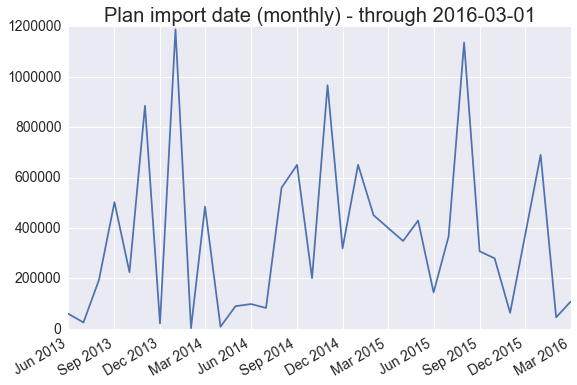

In [48]:
fig, ax = plt.subplots(1)
df_cleaned['yearMonthImport'].value_counts().sort_index().plot(ax=ax)
maxdate = df_cleaned['yearMonthImport'].max().strftime('%Y-%m-%d')
ax.set_title('Plan import date (monthly) - through %s' % maxdate)
ax.set_ylim(0, ax.get_ylim()[1])
summarize_completeness_over_time(df_cleaned,'yearMonthImport')

## Rates are more likely to expire in December
(checked: all rows had import dates)

*** Data completeness over time per column ***


yearMonthRateExpiration,2014-03-01 00:00:00,2014-06-01 00:00:00,2014-09-01 00:00:00,2014-10-01 00:00:00,2014-12-01 00:00:00,2015-01-01 00:00:00,2015-02-01 00:00:00,2015-03-01 00:00:00,2015-05-01 00:00:00,2015-06-01 00:00:00,2015-08-01 00:00:00,2015-09-01 00:00:00,2015-11-01 00:00:00,2015-12-01 00:00:00,2016-01-01 00:00:00,2016-03-01 00:00:00,2016-06-01 00:00:00,2016-09-01 00:00:00,2016-12-01 00:00:00
BusinessYear,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
StateCode,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
IssuerId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
SourceName,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
VersionNum,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
ImportDate,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
FederalTIN,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
RateEffectiveDate,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
RateExpirationDate,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
PlanId,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%


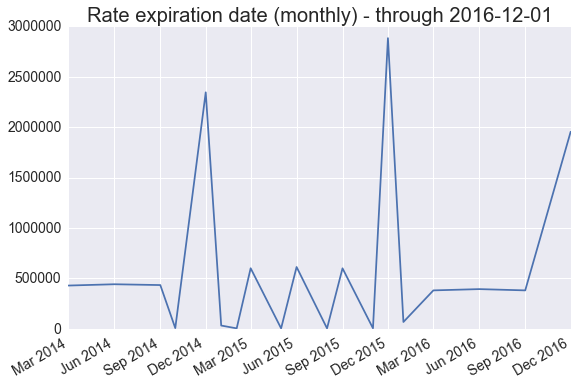

In [49]:
fig, ax = plt.subplots(1)
df_cleaned['yearMonthRateExpiration'].value_counts().sort_index().plot(ax=ax)
maxdate = df_cleaned['yearMonthRateExpiration'].max().strftime('%Y-%m-%d')
ax.set_title('Rate expiration date (monthly) - through %s' % maxdate)
ax.set_ylim(0, ax.get_ylim()[1])
summarize_completeness_over_time(df_cleaned,'yearMonthRateExpiration')

### Florida  and South California import most of the plan rates (about twice to more than others)

The dataset contains plans for 39 of the 50 US states


/Users/steeve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


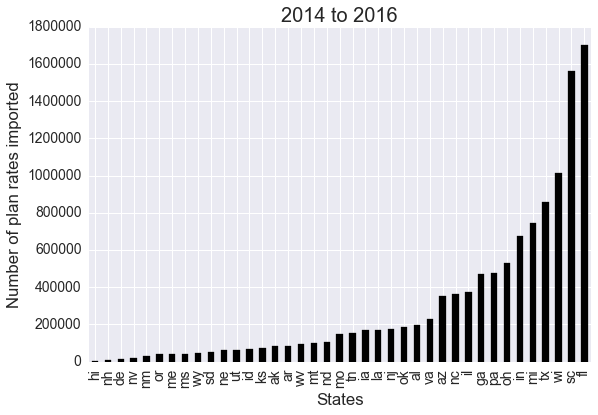

In [51]:
f= plt.figure(figsize=(40,5))
f.suptitle('Number of plans imported', fontsize=20)

print 'The dataset contains plans for',len(np.unique(df_cleaned['StateCode'])), 'of the 50 US states'
a = df_cleaned.groupby('StateCode').agg(['count']);
ax = a['BusinessYear'].sort('count').plot(kind='bar',color='k',legend=False);
ax.set_title('2014 to 2016', fontsize=20)
ax.set_xlabel('States');
ax.set_ylabel('Number of plan rates imported');

### Rates are higher for larger households except for "Individual" status which has the largest rates with a few important outliers

Individual Rates contains 47790 large outlier amounts above $900K 


/Users/steeve/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2125: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


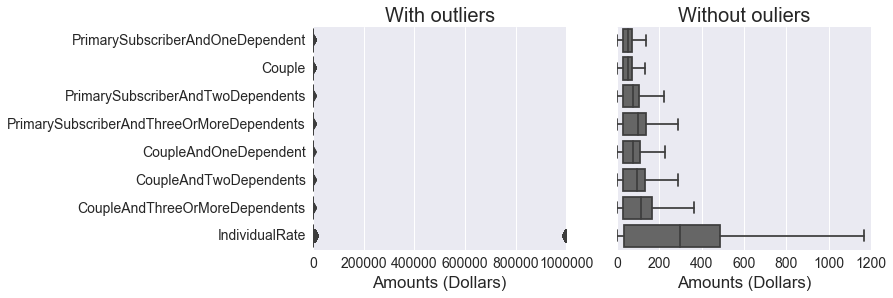

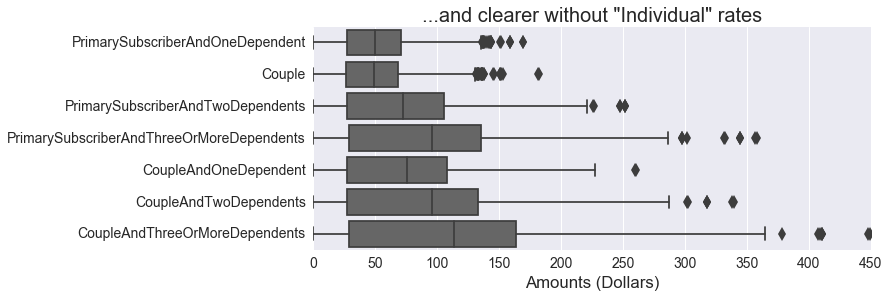

In [52]:
f, (ax1, ax2) = plt.subplots(ncols=2,sharey=True,figsize=(10,4))
myHouseHold = ['PrimarySubscriberAndOneDependent',
                       'Couple',
                       'PrimarySubscriberAndTwoDependents','PrimarySubscriberAndThreeOrMoreDependents',
                       'CoupleAndOneDependent','CoupleAndTwoDependents',
                       'CoupleAndThreeOrMoreDependents','IndividualRate']

#with outlier
sns.boxplot(df_cleaned[myHouseHold],orient='h',fliersize=10,color=".4",ax=ax1);
ax1.set_title('With outliers', fontsize=20);
ax1.set_xlabel('Amounts (Dollars)');

#without outlier
sns.boxplot(df_cleaned[myHouseHold],orient='h',showfliers=False,color=".4",ax=ax2);
ax2.set_title('Without ouliers', fontsize=20);
ax2.set_xlabel('Amounts (Dollars)');

# IndividualTobaccoRate

print 'Individual Rates contains',sum(df_cleaned['IndividualRate']>900000),'large outlier amounts above $900K '

#Without individual rates
f = plt.figure(figsize=(10,4))
myHouseHold = ['PrimarySubscriberAndOneDependent',
                       'Couple',
                       'PrimarySubscriberAndTwoDependents','PrimarySubscriberAndThreeOrMoreDependents',
                       'CoupleAndOneDependent','CoupleAndTwoDependents',
                       'CoupleAndThreeOrMoreDependents']

#with outlier
ax = sns.boxplot(df_cleaned[myHouseHold],orient='h',fliersize=10,color=".4");
ax.set_title('...and clearer without "Individual" rates', fontsize=20);
ax.set_xlabel('Amounts (Dollars)');

### The large outlier rates for "Individual" came from 26 of the dataset 39 states

The dataset contains plans for 39 of the 50 US states


/Users/steeve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


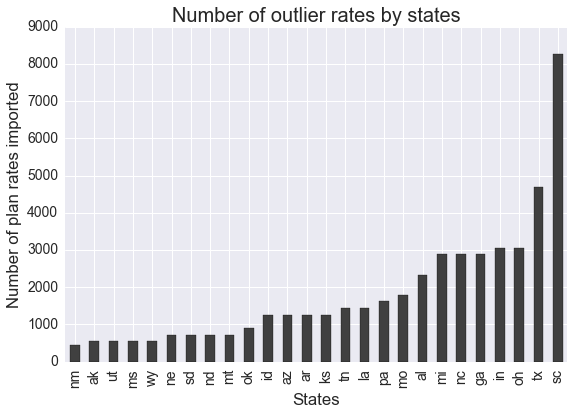

In [54]:
f = plt.figure(figsize=(6,5))
f.suptitle('Individual Rates by States', fontsize=20)

print 'The dataset contains plans for',len(np.unique(df_cleaned['StateCode'])), 'of the 50 US states'
a = df_cleaned[df_cleaned['IndividualRate']>900000].groupby('StateCode').agg(['count']);
ax = a['BusinessYear'].sort('count').plot(kind='bar',color=(.25,.25,.25),legend=False);
ax.set_title('Number of outlier rates by states', fontsize=20)
ax.set_xlabel('States');
ax.set_ylabel('Number of plan rates imported');

### The proportion of the "Individual" rate explained by Tobacco use seems to change a lot by state

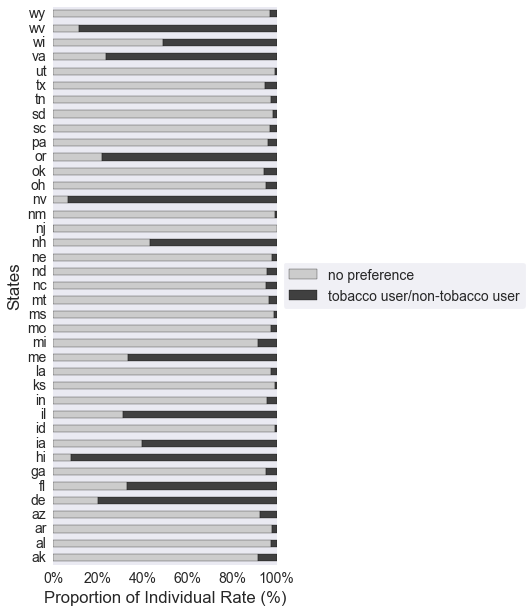

In [56]:
f = plt.figure();
s = df_cleaned.groupby(['StateCode','Tobacco'])['IndividualRate'].mean().unstack();
ax = s.div(s.sum(axis=1),axis=0).fillna(0).plot(kind='barh',stacked=True,grid=False,color=((.8,.8,.8),(.25,.25,.25)),
                                               figsize=(4,10));
percentify_axis(ax,'x');
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
ax.set_xlabel('Proportion of Individual Rate (%)');
ax.set_ylabel('States');